In [3]:
import sys
sys.executable

'/home/exouser/bd-env/bin/python3'

In [4]:
%pip install --upgrade pip
%pip install numpy pandas matplotlib seaborn scikit-learn pyarrow pyspark

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import sys; print(sys.executable)
import numpy, pandas as pd, matplotlib, seaborn
import pyarrow.parquet as pq
print("All good!")

/home/exouser/bd-env/bin/python3
All good!


In [6]:
import pandas as pd
df = pd.DataFrame({"team":["A","A","B","B"], "x":[1,2,3,4]})
df.groupby("team")["x"].mean()

team
A    1.5
B    3.5
Name: x, dtype: float64

In [7]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("check").getOrCreate()
spark.range(5).show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



In [8]:
%pip install -U ipykernel
import sys
!{sys.executable} -m ipykernel install --user --name bd-env --display-name "Python (bd-env)"


Note: you may need to restart the kernel to use updated packages.
Installed kernelspec bd-env in /home/exouser/.local/share/jupyter/kernels/bd-env


In [9]:
import sys, pandas as pd
print(sys.executable)     # should be /home/exouser/bd-env/bin/python3
print(pd.__version__)

/home/exouser/bd-env/bin/python3
2.3.3


In [10]:
import sys, pandas as pd
sys.executable      # should be /home/exouser/bd-env/bin/python3
pd.__version__


'2.3.3'

In [11]:
import sys, pandas as pd
sys.executable  # should be /home/exouser/bd-env/bin/python3
pd.__version__


'2.3.3'

In [3]:
pip install -U pandas pyspark seaborn scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.2/434.2 MB 96.0 MB/s  0:00:03:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyspark: filename=pyspark-4.0.1-py2.py3-none-any.whl size=434813860 sha256=4279d1b64c8edcefe896c0f9870013783cb16e77b38ddcf49413ec418334c7b8
  Stored in directory: /home/exouser/.cache/pip/wheels/c5/a5/ab/c026e66df07e6f9b7bce03d5199ec30bac9a4a89f283e88fa4
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.1
    Uninstalling pyspark-3.5.1:
      Successfully uninstalled pyspark-3.5.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pyspark]m1/2 [pyspark]
Note: you may need to restart the kernel to use updated packages.


3) Quick Spark/Pandas smoke test

In [12]:
# Pandas test
import pandas as pd
df = pd.DataFrame({"team":["A","A","B","B"], "x":[1,2,3,4]})
df.groupby("team")["x"].mean()

team
A    1.5
B    3.5
Name: x, dtype: float64

In [13]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("check").getOrCreate()
spark.range(5).show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



LOAD DATA

In [14]:
import glob, os
sorted(glob.glob('/home/exouser/*'))

['/home/exouser/Provisional_COVID-19_death_counts,_rates,_and_percent_of_total_deaths,_by_jurisdiction_of_residence_20251112.csv',
 '/home/exouser/bd-env',
 '/home/exouser/big_data_project_VSICHULA.ipynb',
 '/home/exouser/work',
 '/home/exouser/workmkdir']

In [15]:
import pandas as pd

# 1) Load the CSV
path = r'/home/exouser/Provisional_COVID-19_death_counts,_rates,_and_percent_of_total_deaths,_by_jurisdiction_of_residence_20251112.csv'
df = pd.read_csv(path, low_memory=False)

In [16]:
# 2) Basic preview
df.shape, df.head()

((38935, 14),
    data_as_of Jurisdiction_Residence  Group data_period_start data_period_end  \
 0  09/25/2025               Region 1  total        01/01/2020      01/04/2020   
 1  09/25/2025               Region 1  total        01/01/2020      01/11/2020   
 2  09/25/2025               Region 1  total        01/01/2020      01/18/2020   
 3  09/25/2025               Region 1  total        01/01/2020      01/25/2020   
 4  09/25/2025               Region 1  total        01/01/2020      02/01/2020   
 
   COVID_deaths  COVID_pct_of_total  pct_change_wk  pct_diff_wk  \
 0            0                 0.0            NaN          NaN   
 1            0                 0.0            NaN          NaN   
 2            0                 0.0            NaN          NaN   
 3            0                 0.0            NaN          NaN   
 4            0                 0.0            NaN          NaN   
 
    crude_COVID_rate  aa_COVID_rate crude_COVID_rate_ann aa_COVID_rate_ann  \
 0        

In [17]:
# List columns
list(df.columns)

['data_as_of',
 'Jurisdiction_Residence',
 'Group',
 'data_period_start',
 'data_period_end',
 'COVID_deaths',
 'COVID_pct_of_total',
 'pct_change_wk',
 'pct_diff_wk',
 'crude_COVID_rate',
 'aa_COVID_rate',
 'crude_COVID_rate_ann',
 'aa_COVID_rate_ann',
 'footnote']

In [18]:
# Try to detect a date column and parse it
date_cols = [c for c in df.columns if 'date' in c.lower()]
if date_cols:
    date_col = date_cols[0]
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    print("Parsed date column:", date_col)
    

In [7]:
# Peek at the last few rows by date if a date column exists
if date_cols:
    df.sort_values(date_col).tail()

In [19]:
# Heuristically pick jurisdiction & covid death columns
jur_cols = [c for c in df.columns if 'juris' in c.lower() or 'state' in c.lower()]
covid_cols = [c for c in df.columns if ('covid' in c.lower()) and ('death' in c.lower()) and ('rate' not in c.lower()) and ('percent' not in c.lower())]

print("jurisdiction candidates:", jur_cols)
print("covid death count candidates:", covid_cols)

if jur_cols and covid_cols and date_cols:
    jcol, dcol, ccol = jur_cols[0], date_cols[0], covid_cols[0]
    tmp = df.copy()
    tmp[ccol] = pd.to_numeric(tmp[ccol], errors='coerce')
    latest = tmp[dcol].max()
    out = (tmp.loc[tmp[dcol] == latest, [jcol, ccol]]
               .groupby(jcol, as_index=False)[ccol].sum()
               .sort_values(ccol, ascending=False))
    print(f"Most recent date: {latest}")
    out.head(10)

jurisdiction candidates: ['Jurisdiction_Residence']
covid death count candidates: ['COVID_deaths']


In [20]:

# Heuristic column discovery
date_cols = [c for c in df.columns if any(k in c.lower() for k in ["date","week","year_week","mmwr","ending"])]
jur_cols  = [c for c in df.columns if any(k in c.lower() for k in ["jurisdiction","state","area","region"])]
covid_cols= [c for c in df.columns if ("covid" in c.lower()) and ("death" in c.lower()) and ("rate" not in c.lower()) and ("percent" not in c.lower())]
rate_cols = [c for c in df.columns if ("rate" in c.lower()) and ("covid" in c.lower())]
pct_cols  = [c for c in df.columns if ("percent" in c.lower()) and ("covid" in c.lower())]

print("Date:", date_cols[:1])
print("Jurisdiction:", jur_cols[:1])
print("COVID death count:", covid_cols[:1])
print("COVID death rate:", rate_cols[:1])
print("Percent of total:", pct_cols[:1])


Date: []
Jurisdiction: ['Jurisdiction_Residence']
COVID death count: ['COVID_deaths']
COVID death rate: ['crude_COVID_rate']
Percent of total: []


In [21]:
import pandas as pd
import numpy as np

# you already set this
path = r'/home/exouser/Provisional_COVID-19_death_counts,_rates,_and_percent_of_total_deaths,_by_jurisdiction_of_residence_20251112.csv'

# parse the dates if present
df = pd.read_csv(path, low_memory=False, parse_dates=['data_period_start','data_period_end'])

# make column names easy to work with
df.columns = (df.columns.str.strip()
              .str.lower()
              .str.replace('[^0-9a-zA-Z]+', '_', regex=True)
              .str.strip('_'))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38935 entries, 0 to 38934
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_as_of              38935 non-null  object        
 1   jurisdiction_residence  38935 non-null  object        
 2   group                   38935 non-null  object        
 3   data_period_start       38935 non-null  datetime64[ns]
 4   data_period_end         38935 non-null  datetime64[ns]
 5   covid_deaths            34173 non-null  object        
 6   covid_pct_of_total      34173 non-null  float64       
 7   pct_change_wk           13107 non-null  float64       
 8   pct_diff_wk             13856 non-null  float64       
 9   crude_covid_rate        31594 non-null  float64       
 10  aa_covid_rate           31594 non-null  float64       
 11  crude_covid_rate_ann    31594 non-null  object        
 12  aa_covid_rate_ann       31594 non-null  object

In [22]:
# NA % by column (top 20)
df.isna().mean().sort_values(ascending=False).head(20)

# distinct values & date range
df['jurisdiction_residence'].nunique(), df['group'].unique()
df[['data_period_start','data_period_end']].agg(['min','max'])


,data_period_start,data_period_end
min,2019-12-29,2020-01-04
max,2025-09-14,2025-09-20


In [23]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("check").getOrCreate()
spark.range(5).show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



In [24]:
import pandas as pd
import numpy as np

# you already set this
path = r'/home/exouser/Provisional_COVID-19_death_counts,_rates,_and_percent_of_total_deaths,_by_jurisdiction_of_residence_20251112.csv'

# parse the dates if present
df = pd.read_csv(path, low_memory=False, parse_dates=['data_period_start','data_period_end'])

# make column names easy to work with
df.columns = (df.columns.str.strip()
              .str.lower()
              .str.replace('[^0-9a-zA-Z]+', '_', regex=True)
              .str.strip('_'))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38935 entries, 0 to 38934
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_as_of              38935 non-null  object        
 1   jurisdiction_residence  38935 non-null  object        
 2   group                   38935 non-null  object        
 3   data_period_start       38935 non-null  datetime64[ns]
 4   data_period_end         38935 non-null  datetime64[ns]
 5   covid_deaths            34173 non-null  object        
 6   covid_pct_of_total      34173 non-null  float64       
 7   pct_change_wk           13107 non-null  float64       
 8   pct_diff_wk             13856 non-null  float64       
 9   crude_covid_rate        31594 non-null  float64       
 10  aa_covid_rate           31594 non-null  float64       
 11  crude_covid_rate_ann    31594 non-null  object        
 12  aa_covid_rate_ann       31594 non-null  object

In [25]:
# NA % by column (top 20)
df.isna().mean().sort_values(ascending=False).head(20)

# distinct values & date range
df['jurisdiction_residence'].nunique(), df['group'].unique()
df[['data_period_start','data_period_end']].agg(['min','max'])

,data_period_start,data_period_end
min,2019-12-29,2020-01-04
max,2025-09-14,2025-09-20


In [27]:
mask = df['group'].str.lower().eq('total')
by_state = (df.loc[mask]
            .groupby('jurisdiction_residence', as_index=False)
            .agg(covid_deaths=('covid_deaths','sum')))
by_state.sort_values('covid_deaths', ascending=False).head(10)



,jurisdiction_residence,covid_deaths
49,Region 7,"0351393034867229591,2311,4811,6991,8812,0382,1..."
16,Kansas,0327111414016720222823725127027929831432734537...
57,United States,"0136610162231691297153,92614,03930,34547,54663..."
48,Region 6,"00673309141,6692,3983,0843,7254,3154,8285,2195..."
38,Oklahoma,0028681201692172632923123363623773954134314594...
51,Region 9,"0013622456461,1821,8622,5723,2684,0014,6625,28..."
4,California,"0012521844818671,4041,9402,4793,0323,5374,0234..."
47,Region 5,"000735131,8853,8836,1708,44810,64212,67114,389..."
32,New York,"000523461,3933,2765,1746,6737,7768,6359,2879,7..."
0,Alabama,"00029741482393254075246257128239149991,0951,20..."


In [29]:
# Missingness
miss = df.isna().mean().sort_values(ascending=False).to_frame("missing_frac")
miss.head(15)


,missing_frac
footnote,0.811455
pct_change_wk,0.663362
pct_diff_wk,0.644125
crude_covid_rate,0.188545
aa_covid_rate,0.188545
crude_covid_rate_ann,0.188545
aa_covid_rate_ann,0.188545
covid_deaths,0.122306
covid_pct_of_total,0.122306
data_period_end,0.000000


Has 'covid_deaths'? True
dtypes:
 jurisdiction_residence    object
group                     object
dtype: object
      data_period_start  covid_deaths
13156        2020-01-01           0.0
13358        2020-01-01       42545.0
13357        2020-01-01       42479.0
13356        2020-01-01       42425.0
13355        2020-01-01       42368.0


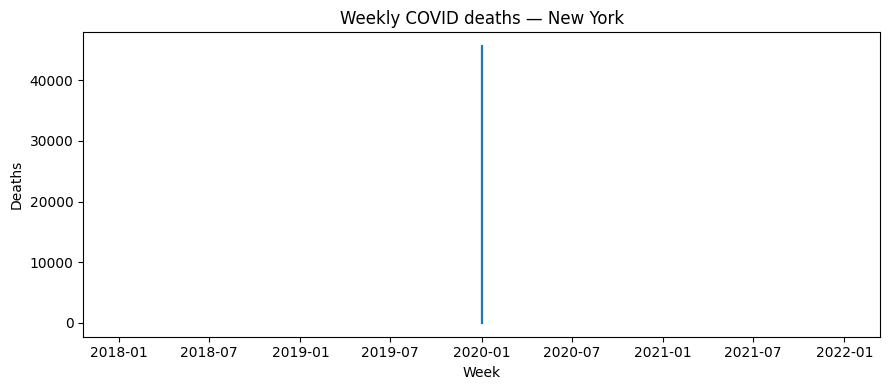

In [32]:
# 1) Sanity check: do your filters return rows and does the column exist?
state = "New York"   # or any state name present in the data
print("Has 'covid_deaths'?", 'covid_deaths' in df.columns)
print("dtypes:\n", df[['jurisdiction_residence','group']].dtypes)

# 2) Make sure dates are parsed and group text is normalized
df['data_period_start'] = pd.to_datetime(df['data_period_start'], errors='coerce')
df['group'] = df['group'].astype(str).str.strip().str.lower()

# 3) Force covid_deaths to numeric (strip commas/other non-digits first)
df['covid_deaths'] = (
    df['covid_deaths']
      .astype(str)
      .str.replace(',', '', regex=False)
      .str.replace(r'[^0-9\.\-]', '', regex=True)
)
df['covid_deaths'] = pd.to_numeric(df['covid_deaths'], errors='coerce')

# 4) Filter & sort
m = (df['jurisdiction_residence'].eq(state)) & (df['group'].eq('total'))
plot_df = df.loc[m].sort_values('data_period_start')

print(plot_df[['data_period_start','covid_deaths']].head())  # quick peek

# 5) Plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(plot_df['data_period_start'], plot_df['covid_deaths'])
ax.set_title(f"Weekly COVID deaths — {state}")
ax.set_xlabel("Week")
ax.set_ylabel("Deaths")
fig.tight_layout()
plt.show()


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path you used earlier
path = r'/home/exouser/Provisional_COVID-19_death_counts,_rates,_and_percent_of_total_deaths,_by_jurisdiction_of_residence_20251112.csv'

# Load
df = pd.read_csv(path, low_memory=False)

# Normalize column names
df.columns = (df.columns.str.strip().str.lower()
              .str.replace(r'[^0-9a-zA-Z]+','_', regex=True)
              .str.strip('_'))

# Pick a date column
for c in ['data_period_start', 'week_ending_date', 'end_date', 'date']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')
        date_col = c
        break

# Keep "total" rows (not by sex/age/etc.)
if 'group' in df.columns:
    df['group'] = df['group'].astype(str).str.lower().str.strip()
    df_tot = df[df['group'].eq('total')].copy()
else:
    df_tot = df.copy()

# Make key numeric columns numeric
def to_num(s):
    return pd.to_numeric(
        (s.astype(str)
           .str.replace(',', '', regex=False)
           .str.replace(r'[^0-9\.\-]', '', regex=True)),
        errors='coerce'
    )

for col_like in ['covid_deaths','covid_death_rate','covid_pct_of_total',
                 'pct_change_wk','pct_diff_wk','covid_rate','crude_rate']:
    if col_like in df_tot.columns:
        df_tot[col_like] = to_num(df_tot[col_like])

# Basic convenience names
jr = 'jurisdiction_residence' if 'jurisdiction_residence' in df_tot.columns else 'state'

# Sort by date for plotting
df_tot = df_tot.sort_values(date_col)


National weekly deaths + 4-week rolling average

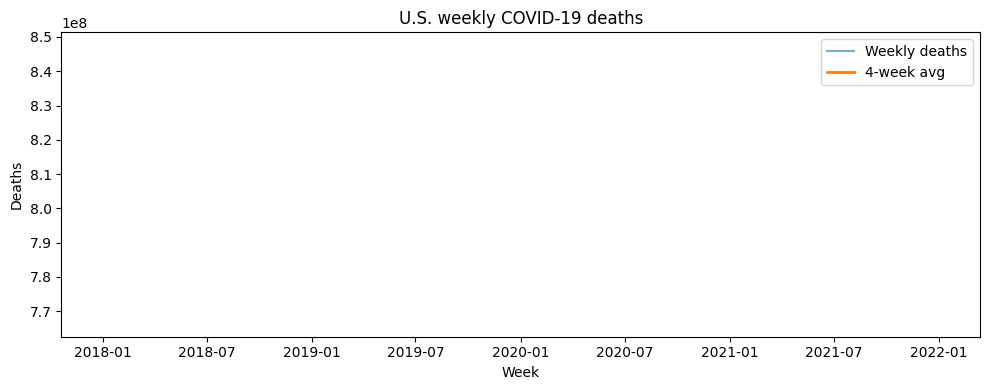

In [34]:
nat = (df_tot.groupby(date_col, as_index=False)['covid_deaths']
             .sum()
             .sort_values(date_col))
nat['roll4'] = nat['covid_deaths'].rolling(4, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(nat[date_col], nat['covid_deaths'], label='Weekly deaths', alpha=0.6)
ax.plot(nat[date_col], nat['roll4'], label='4-week avg', linewidth=2)
ax.set_title('U.S. weekly COVID-19 deaths')
ax.set_xlabel('Week'); ax.set_ylabel('Deaths'); ax.legend(); fig.tight_layout()
plt.show()


Top 6 states by cumulative deaths (lines)

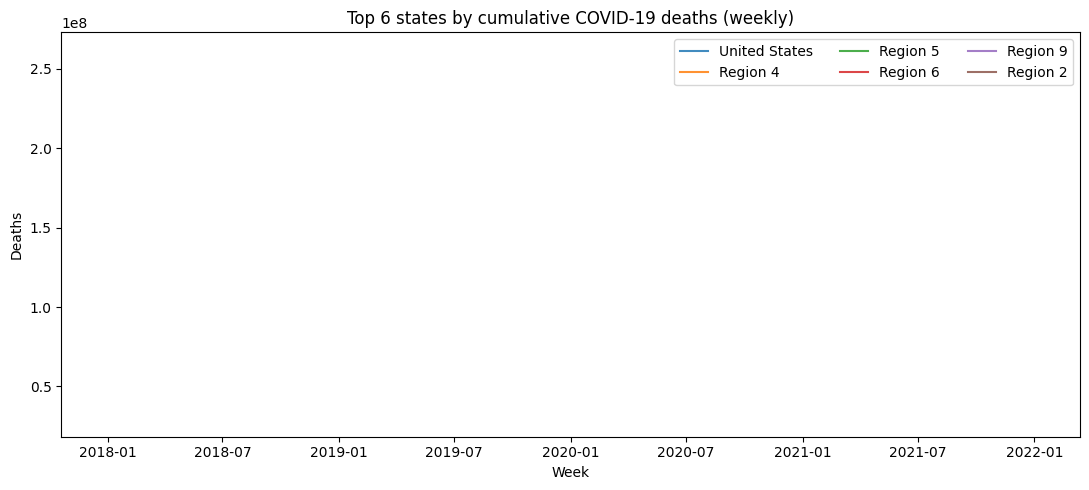

In [35]:
top6 = (df_tot.groupby(jr)['covid_deaths'].sum()
              .nlargest(6)
              .index.tolist())

fig, ax = plt.subplots(figsize=(11,5))
for s in top6:
    tmp = df_tot[df_tot[jr].eq(s)].groupby(date_col)['covid_deaths'].sum()
    ax.plot(tmp.index, tmp.values, label=s, alpha=0.85)

ax.set_title('Top 6 states by cumulative COVID-19 deaths (weekly)')
ax.set_xlabel('Week'); ax.set_ylabel('Deaths'); ax.legend(ncol=3); fig.tight_layout()
plt.show()


3) Heatmap – weekly deaths by state (log scale, darker = more)

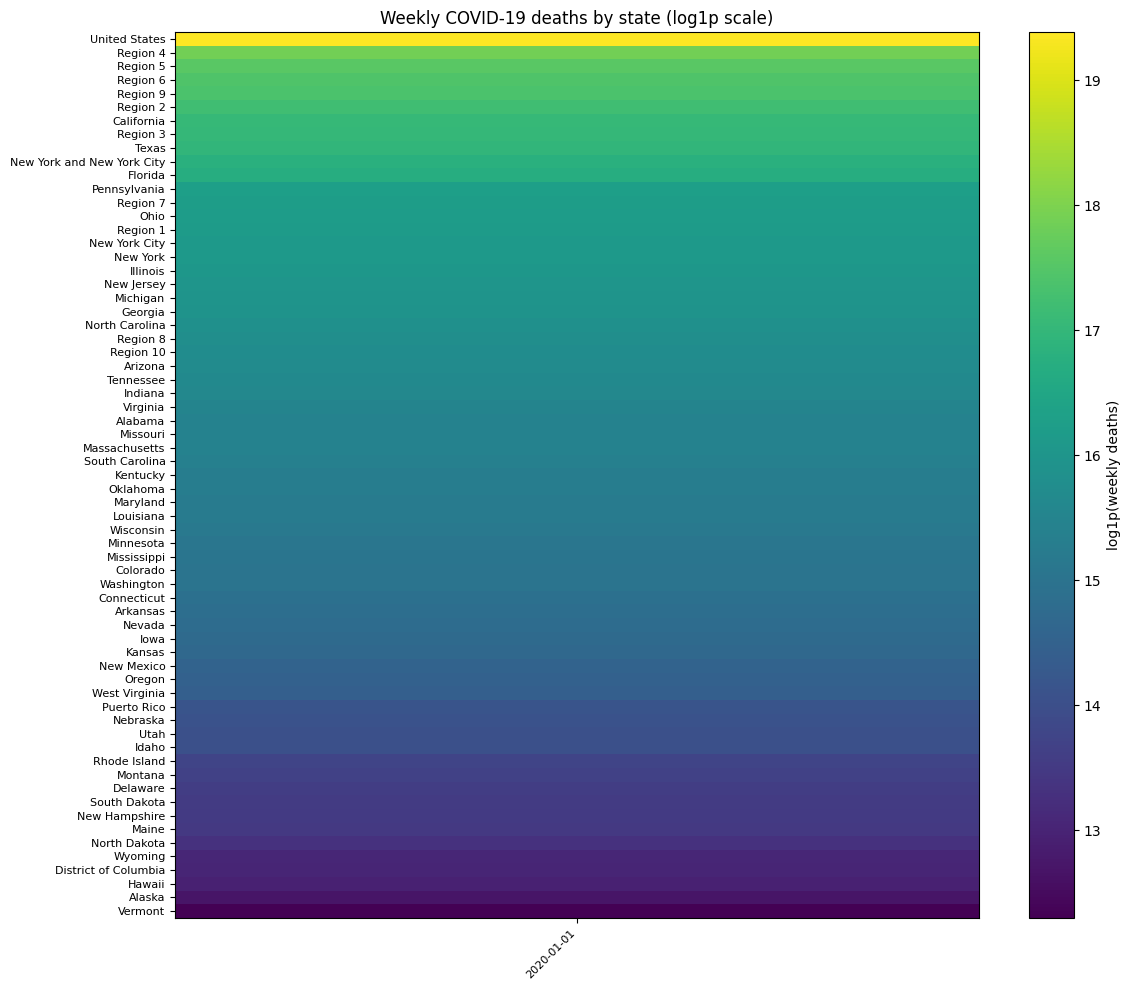

In [36]:
# Pivot: rows = state, cols = week
heat = (df_tot.pivot_table(index=jr, columns=date_col,
                           values='covid_deaths', aggfunc='sum')
              .fillna(0))

# Order states by total deaths
heat = heat.loc[heat.sum(axis=1).sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(12,10))
im = ax.imshow(np.log1p(heat.values), aspect='auto', interpolation='nearest')
ax.set_title('Weekly COVID-19 deaths by state (log1p scale)')
ax.set_yticks(range(len(heat.index))); ax.set_yticklabels(heat.index, fontsize=8)
ax.set_xticks(range(0, heat.shape[1], max(1, heat.shape[1]//10)))
ax.set_xticklabels([pd.to_datetime(d).strftime('%Y-%m-%d')
                    for d in heat.columns[::max(1, heat.shape[1]//10)]], rotation=45, ha='right', fontsize=8)
cbar = plt.colorbar(im, ax=ax); cbar.set_label('log1p(weekly deaths)')
fig.tight_layout(); plt.show()


Share of total deaths (%), selected states

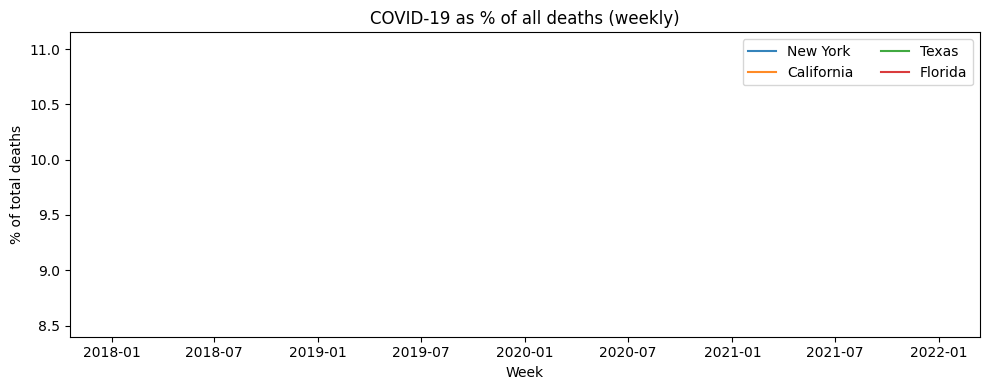

In [37]:
states = ['New York','California','Texas','Florida']
states = [s for s in states if s in df_tot[jr].unique()]

if 'covid_pct_of_total' in df_tot.columns and states:
    fig, ax = plt.subplots(figsize=(10,4))
    for s in states:
        tmp = (df_tot[df_tot[jr].eq(s)]
                 .groupby(date_col)['covid_pct_of_total']
                 .mean())
        ax.plot(tmp.index, tmp.values, label=s, alpha=0.9)
    ax.set_title('COVID-19 as % of all deaths (weekly)')
    ax.set_ylabel('% of total deaths'); ax.set_xlabel('Week'); ax.legend(ncol=2)
    fig.tight_layout(); plt.show()
else:
    print("Column covid_pct_of_total or chosen states not found.")


Week-over-week change (%), one state

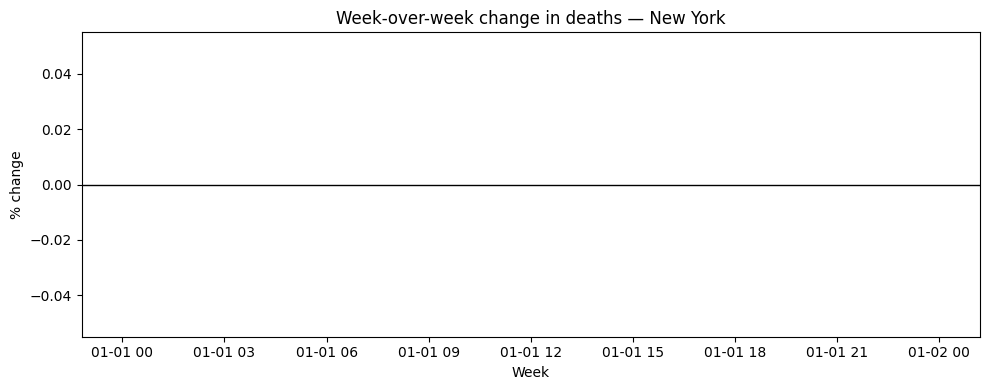

In [38]:
state = 'New York'   # <- change if you like
wk = (df_tot[df_tot[jr].eq(state)]
        .groupby(date_col)['covid_deaths'].sum()
        .sort_index())
chg = wk.pct_change()*100

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(chg.index, chg.values)
ax.axhline(0, color='k', linewidth=1)
ax.set_title(f'Week-over-week change in deaths — {state}')
ax.set_ylabel('% change'); ax.set_xlabel('Week'); fig.tight_layout()
plt.show()


Snapshot bar chart — top 15 states on a given week

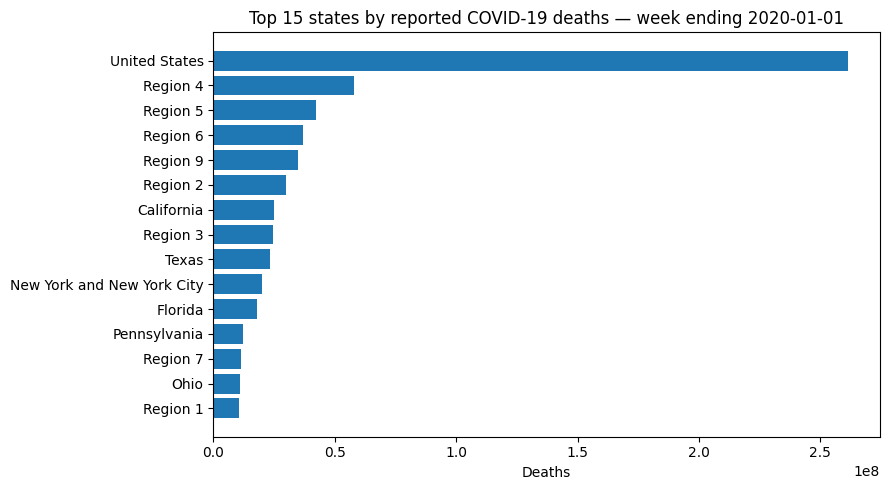

In [39]:
snapshot_date = nat[date_col].max()  # latest week; set a specific date if desired
snap = (df_tot[df_tot[date_col].eq(snapshot_date)]
          .groupby(jr)['covid_deaths'].sum()
          .sort_values(ascending=False).head(15))

fig, ax = plt.subplots(figsize=(9,5))
ax.barh(snap.index[::-1], snap.values[::-1])
ax.set_title(f'Top 15 states by reported COVID-19 deaths — week ending {snapshot_date.date()}')
ax.set_xlabel('Deaths'); fig.tight_layout(); plt.show()


Death rates (if available)

In [40]:
rate_col = None
for c in ['covid_death_rate','crude_rate','covid_rate']:
    if c in df_tot.columns:
        rate_col = c; break

if rate_col:
    fig, ax = plt.subplots(figsize=(10,4))
    for s in top6:
        tmp = (df_tot[df_tot[jr].eq(s)]
                 .groupby(date_col)[rate_col].mean())
        ax.plot(tmp.index, tmp.values, label=s)
    ax.set_title(f'{rate_col.replace("_"," ").title()} — Top 6 states')
    ax.set_xlabel('Week'); ax.set_ylabel('Rate'); ax.legend(ncol=3); fig.tight_layout(); plt.show()
else:
    print("No rate column found to plot.")


No rate column found to plot.


Clean types + keep weekly rows

In [41]:
# Dates → datetime
for c in ['data_period_start','data_period_end']:
    df[c] = pd.to_datetime(df[c], errors='coerce')

# Numbers → numeric
num_cols = [
    'covid_deaths','total_deaths','covid_pct_of_total',
    'pct_change_wk','pct_diff_wk','covid_rate','covid_rate_age_adjusted'
]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# *** IMPORTANT *** : use weekly rows, not totals
weekly = (
    df[df['group'].str.lower().eq('by week')]
      .sort_values('data_period_start')
      .copy()
)


In [42]:
weekly[['jurisdiction_residence','group']].head()
weekly[['data_period_start','covid_deaths']].dtypes
weekly['covid_deaths'].describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: covid_deaths, dtype: float64

Single state line chart (+ 4-week average)

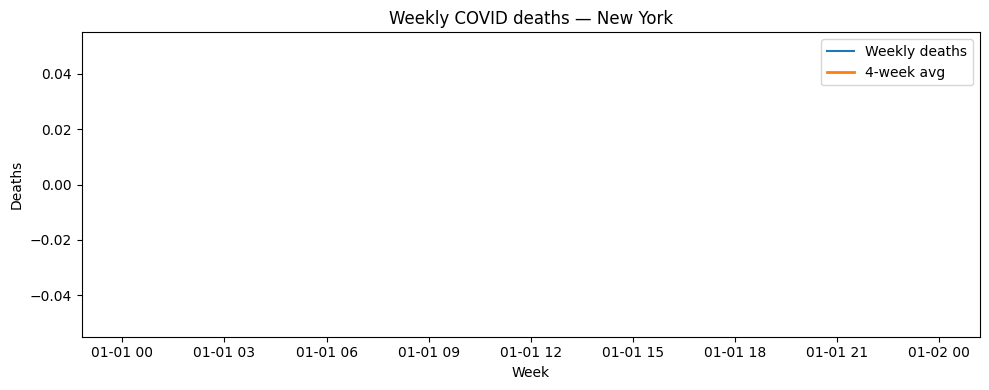

In [43]:
import matplotlib.pyplot as plt

state = 'New York'  # try 'California', 'Texas', etc.
s = weekly[weekly['jurisdiction_residence'].eq(state)]

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(s['data_period_start'], s['covid_deaths'], label='Weekly deaths')
ax.plot(s['data_period_start'],
        s['covid_deaths'].rolling(4, min_periods=1).mean(),
        label='4-week avg', linewidth=2)
ax.set_title(f'Weekly COVID deaths — {state}')
ax.set_xlabel('Week'); ax.set_ylabel('Deaths')
ax.legend(); fig.tight_layout()


U.S. national weekly deaths

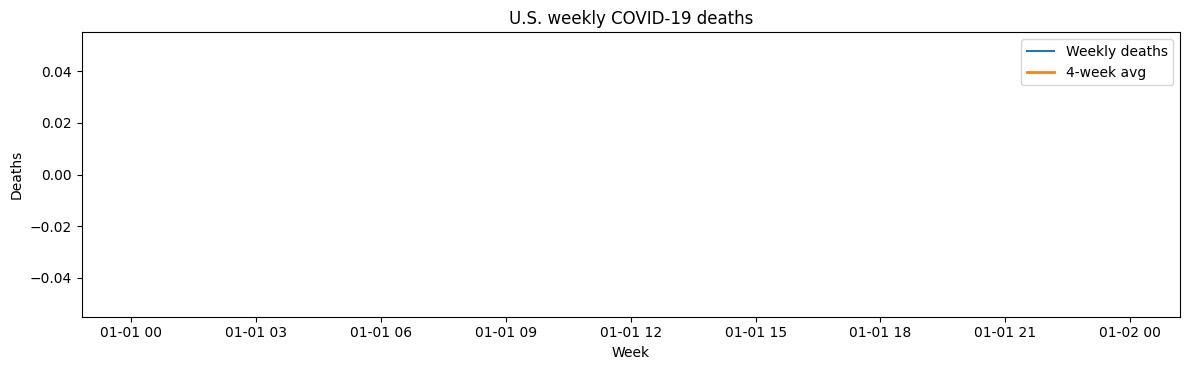

In [44]:
us = weekly[weekly['jurisdiction_residence'].eq('United States')]

fig, ax = plt.subplots(figsize=(12,3.8))
ax.plot(us['data_period_start'], us['covid_deaths'], label='Weekly deaths')
ax.plot(us['data_period_start'],
        us['covid_deaths'].rolling(4, min_periods=1).mean(),
        label='4-week avg', linewidth=2)
ax.set_title('U.S. weekly COVID-19 deaths')
ax.set_xlabel('Week'); ax.set_ylabel('Deaths')
ax.legend(); fig.tight_layout()


Clean types once, right after read_csv

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# load
path = r'/home/exouser/Provisional_COVID-19_death_counts,_rates,_and_percent_of_total_deaths,_by_jurisdiction_of_residence_20251112.csv'
df = pd.read_csv(path, low_memory=False)

# normalize column names
df.columns = (df.columns.str.strip().str.lower()
              .str.replace(r'[^0-9a-z]+', '_', regex=True)
              .str.strip('_'))

# make dates real datetimes (keep whichever exist)
for c in ['data_period_start','data_period_end','week_ending_date','end_date']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

# make numeric columns truly numeric
num_like = [c for c in df.columns if any(k in c for k in ['death','rate','pct'])]
for c in num_like:
    df[c] = (df[c].astype(str)
                   .str.replace(',', '', regex=False)
                   .str.replace('%', '', regex=False))
    df[c] = pd.to_numeric(df[c], errors='coerce')

# filter to WEEKLY rows (this dataset mixes “total/by month/by week”)
weekly = df[df['group'].str.contains('week', case=False, na=False)].copy()

# quick sanity checks (these should NOT be empty / object types)
print('weekly rows:', len(weekly))
print(weekly[['jurisdiction_residence','group','data_period_start','covid_deaths']].head())
print(weekly[['data_period_start','covid_deaths']].dtypes)

# helper: nice date ticks
def nice_date_axis(ax):
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))


weekly rows: 19435
      jurisdiction_residence   group data_period_start  covid_deaths
19435               Region 1  weekly        2019-12-29           0.0
19436               Region 1  weekly        2020-01-05           0.0
19437               Region 1  weekly        2020-01-12           0.0
19438               Region 1  weekly        2020-01-19           0.0
19439               Region 1  weekly        2020-01-26           0.0
data_period_start    datetime64[ns]
covid_deaths                float64
dtype: object


U.S. weekly deaths + 4-week average

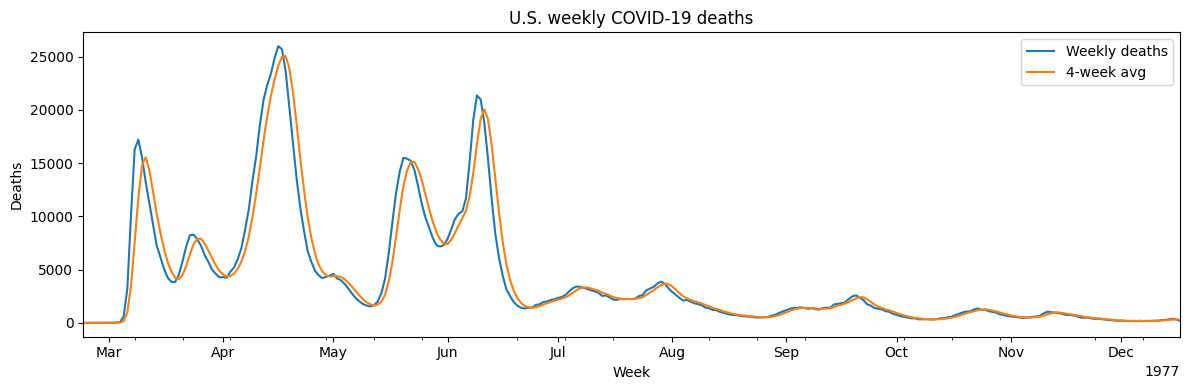

In [46]:
us = weekly[weekly['jurisdiction_residence'].eq('United States')].sort_values('data_period_start')
assert not us.empty, 'United States weekly slice is empty'

ax = us.set_index('data_period_start')['covid_deaths'].plot(figsize=(12,4), label='Weekly deaths')
(us.set_index('data_period_start')['covid_deaths']
   .rolling(4, min_periods=1).mean()
   .plot(ax=ax, label='4-week avg'))
ax.set(title='U.S. weekly COVID-19 deaths', xlabel='Week', ylabel='Deaths')
nice_date_axis(ax)
ax.legend()
plt.tight_layout(); plt.show()


One state’s weekly trend (change the name if you like)

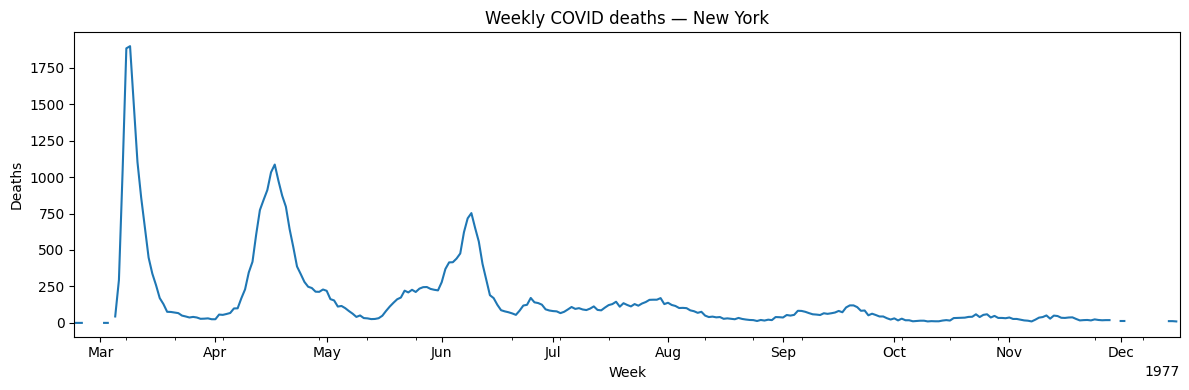

In [47]:
state = 'New York'   # e.g., 'California', 'Texas', etc.

st = weekly[weekly['jurisdiction_residence'].eq(state)].sort_values('data_period_start')
assert not st.empty, f'{state} weekly slice is empty'

ax = st.set_index('data_period_start')['covid_deaths'].plot(figsize=(12,4))
ax.set(title=f'Weekly COVID deaths — {state}', xlabel='Week', ylabel='Deaths')
nice_date_axis(ax)
plt.tight_layout(); plt.show()


Top 6 states by latest weekly deaths (lines over time)

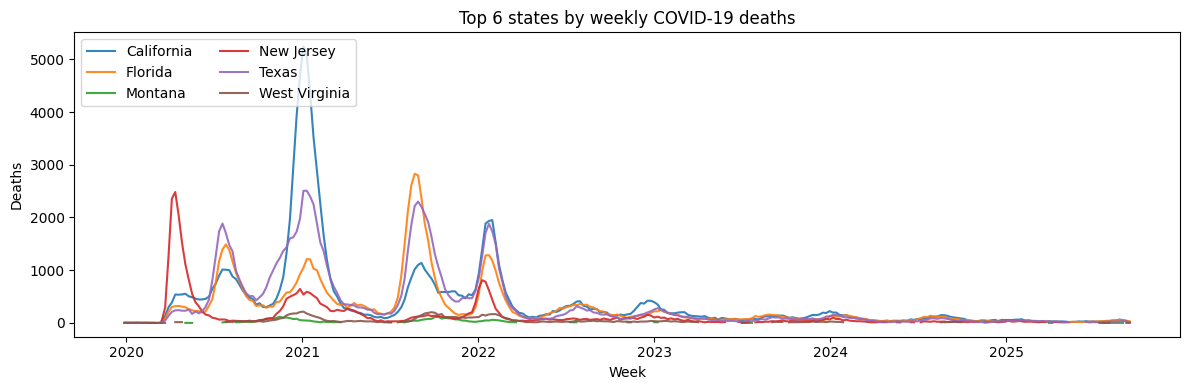

In [48]:
# drop aggregate rows like “United States” and “Region X”
states_only = weekly[~weekly['jurisdiction_residence'].str.contains('United States|Region', case=False, na=False)].copy()

# find each state’s latest week row
latest = (states_only.sort_values('data_period_start')
          .groupby('jurisdiction_residence', as_index=False)
          .tail(1))

top6_names = (latest.nlargest(6, 'covid_deaths')['jurisdiction_residence']
                    .tolist())

curves = states_only[states_only['jurisdiction_residence'].isin(top6_names)].copy()

fig, ax = plt.subplots(figsize=(12,4))
for name, g in curves.groupby('jurisdiction_residence'):
    g = g.sort_values('data_period_start')
    ax.plot(g['data_period_start'], g['covid_deaths'], label=name, alpha=0.9)

ax.set(title='Top 6 states by weekly COVID-19 deaths', xlabel='Week', ylabel='Deaths')
nice_date_axis(ax)
ax.legend(ncol=2, loc='upper left')
plt.tight_layout(); plt.show()


% of all deaths (if that column exists)

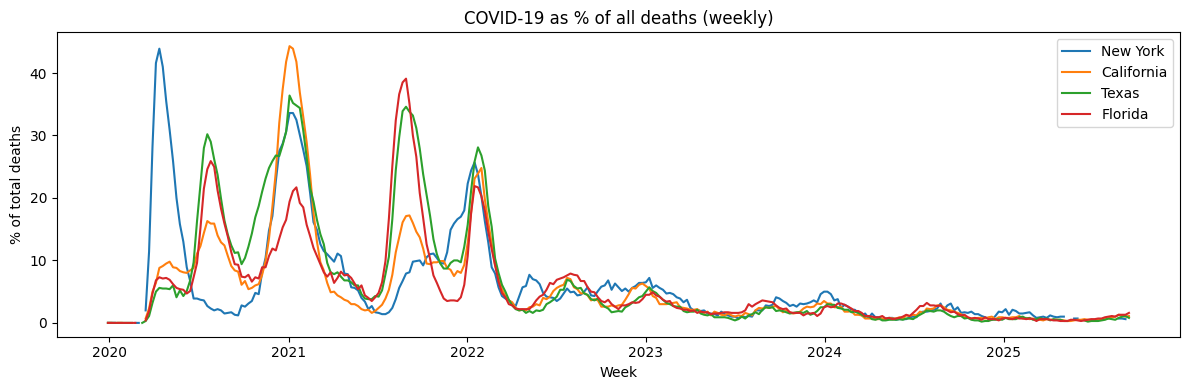

In [49]:
pct_col = [c for c in weekly.columns if 'covid_pct_of_total' in c]
if pct_col:
    pct_col = pct_col[0]
    states = ['New York','California','Texas','Florida']
    fig, ax = plt.subplots(figsize=(12,4))
    for s in states:
        g = weekly[weekly['jurisdiction_residence'].eq(s)].sort_values('data_period_start')
        if not g.empty:
            ax.plot(g['data_period_start'], g[pct_col], label=s)
    ax.set(title='COVID-19 as % of all deaths (weekly)', xlabel='Week', ylabel='% of total deaths')
    nice_date_axis(ax)
    ax.legend()
    plt.tight_layout(); plt.show()
else:
    print('No "% of total" column found (looked for "covid_pct_of_total").')


Week-over-week change for one state

/tmp/ipykernel_181906/4292915134.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  s['pct_change'] = s['covid_deaths'].pct_change()*100


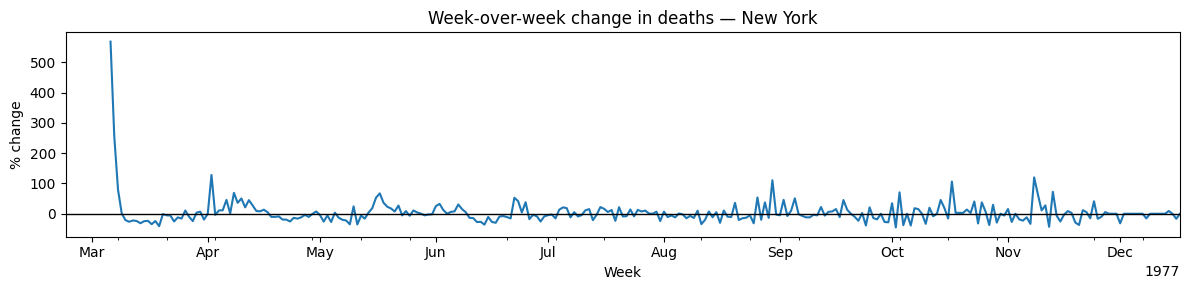

In [50]:
s = weekly[weekly['jurisdiction_residence'].eq(state)].sort_values('data_period_start')
s['pct_change'] = s['covid_deaths'].pct_change()*100

ax = s.set_index('data_period_start')['pct_change'].plot(figsize=(12,3))
ax.axhline(0, color='k', lw=1)
ax.set(title=f'Week-over-week change in deaths — {state}', xlabel='Week', ylabel='% change')
nice_date_axis(ax)
plt.tight_layout(); plt.show()


Calendar heatmap (U.S. weekly deaths by week-of-year)

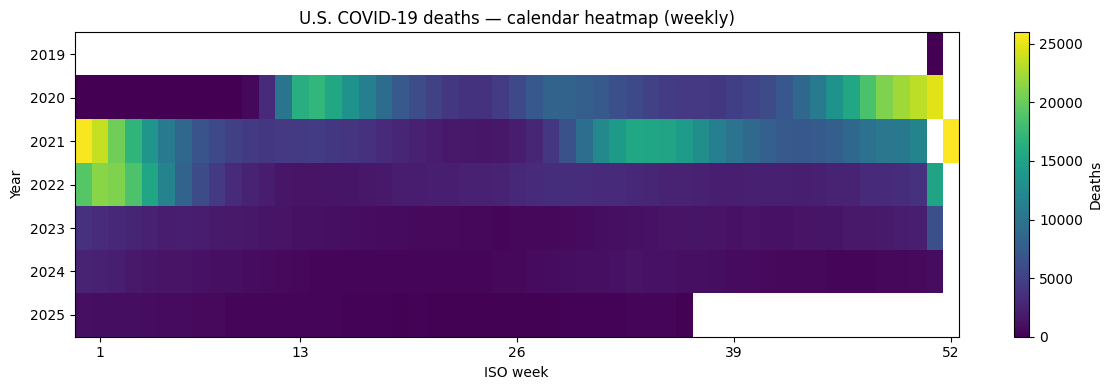

In [51]:
import numpy as np
import matplotlib.pyplot as plt

us = (weekly[weekly['jurisdiction_residence'].eq('United States')]
        .sort_values('data_period_start')
        .copy())

us['year'] = us['data_period_start'].dt.year
us['week'] = us['data_period_start'].dt.isocalendar().week.astype(int)

cal = (us.pivot_table(index='year', columns='week', values='covid_deaths', aggfunc='sum')
         .reindex(columns=range(1, 54)))   # 1..53 so the grid is rectangular

fig, ax = plt.subplots(figsize=(12,4))
im = ax.imshow(cal.values, aspect='auto', interpolation='nearest')
ax.set(title='U.S. COVID-19 deaths — calendar heatmap (weekly)',
       xlabel='ISO week', ylabel='Year')
ax.set_xticks([1, 13, 26, 39, 52]); ax.set_xticklabels([1, 13, 26, 39, 52])
ax.set_yticks(np.arange(len(cal.index))); ax.set_yticklabels(cal.index)
plt.colorbar(im, ax=ax, label='Deaths')
plt.tight_layout(); plt.show()


Small multiples — six big states, weekly trend

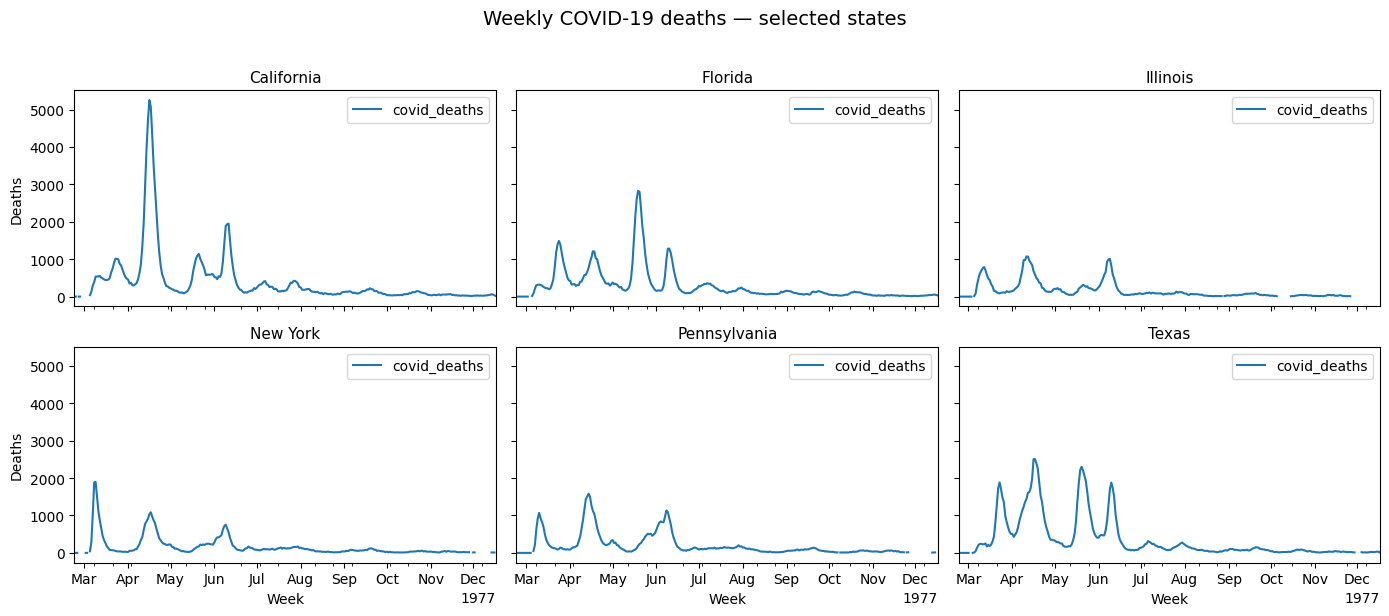

In [52]:
states = ['New York','California','Texas','Florida','Illinois','Pennsylvania']

g = (weekly[weekly['jurisdiction_residence'].isin(states)]
       .sort_values('data_period_start'))

fig, axes = plt.subplots(2, 3, figsize=(14,6), sharex=True, sharey=True)
axes = axes.ravel()

for ax, (name, sub) in zip(axes, g.groupby('jurisdiction_residence')):
    sub.plot(x='data_period_start', y='covid_deaths', ax=ax)
    ax.set_title(name, fontsize=11)
    ax.set(xlabel='', ylabel='Deaths')
    nice_date_axis(ax)

for ax in axes[3:]:
    ax.set_xlabel('Week')

fig.suptitle('Weekly COVID-19 deaths — selected states', y=1.02, fontsize=14)
plt.tight_layout(); plt.show()


Cumulative deaths — top 10 states (lines)

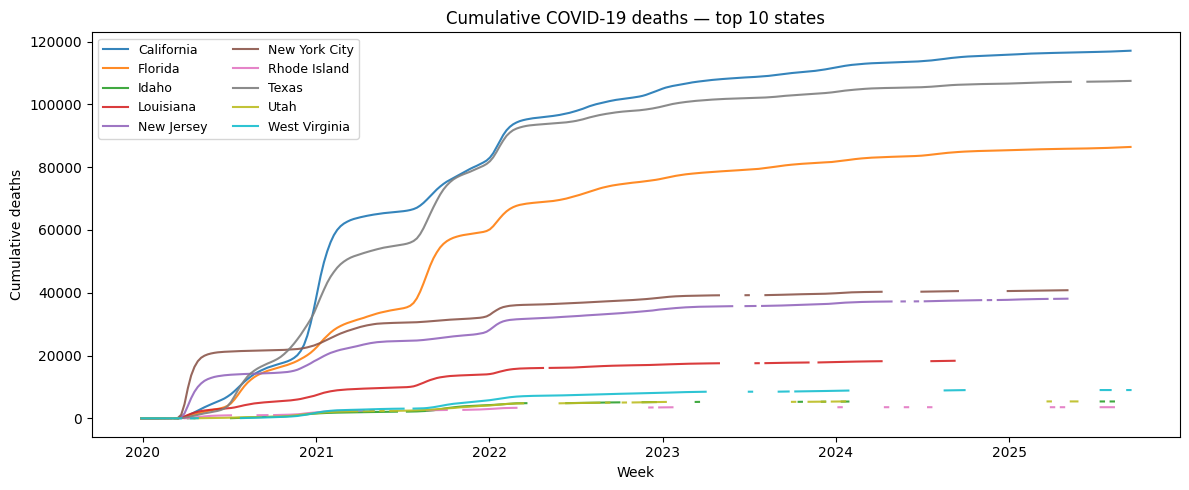

In [53]:
# exclude aggregates
states_only = weekly[~weekly['jurisdiction_residence'].str.contains('United States|Region', case=False, na=False)].copy()

cum = (states_only.sort_values('data_period_start')
       .assign(cum=lambda d: d.groupby('jurisdiction_residence')['covid_deaths'].cumsum()))

last = (cum.groupby('jurisdiction_residence', as_index=False)
          .tail(1)
          .nlargest(10, 'cum')['jurisdiction_residence'])

top10 = cum[cum['jurisdiction_residence'].isin(last)]

fig, ax = plt.subplots(figsize=(12,5))
for name, sub in top10.groupby('jurisdiction_residence'):
    ax.plot(sub['data_period_start'], sub['cum'], lw=1.5, label=name, alpha=.9)

ax.set(title='Cumulative COVID-19 deaths — top 10 states',
       xlabel='Week', ylabel='Cumulative deaths')
nice_date_axis(ax)
ax.legend(ncol=2, fontsize=9)
plt.tight_layout(); plt.show()


Latest week” snapshot — top 15 states (bar chart)

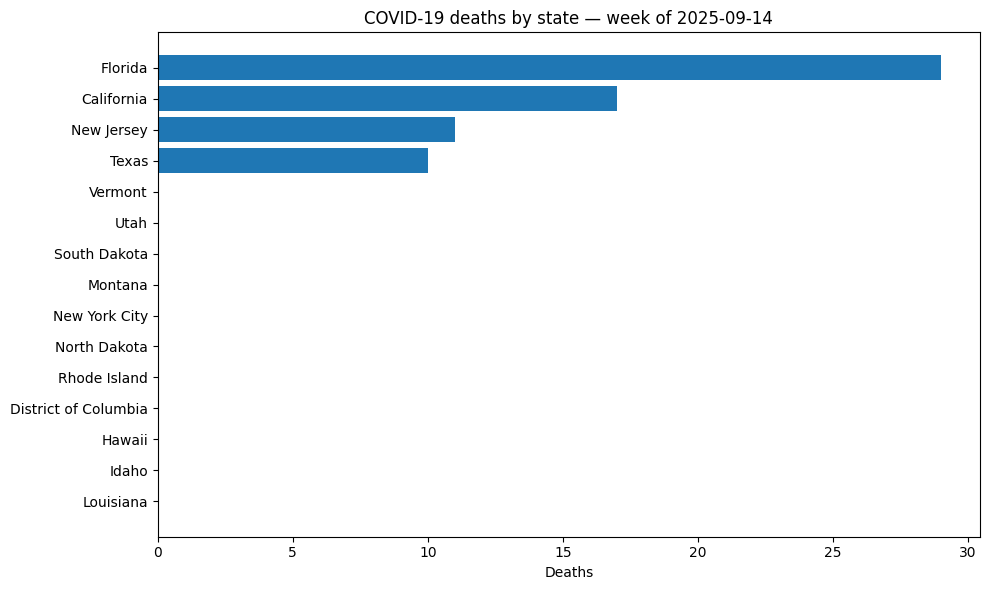

In [54]:
latest_week = states_only['data_period_start'].max()
snap = (states_only[states_only['data_period_start'].eq(latest_week)]
        .nlargest(15, 'covid_deaths')
        .sort_values('covid_deaths'))

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(snap['jurisdiction_residence'], snap['covid_deaths'])
ax.set(title=f'COVID-19 deaths by state — week of {latest_week.date()}',
       xlabel='Deaths', ylabel='')
plt.tight_layout(); plt.show()


Regional stacked area (Regions 1–10)

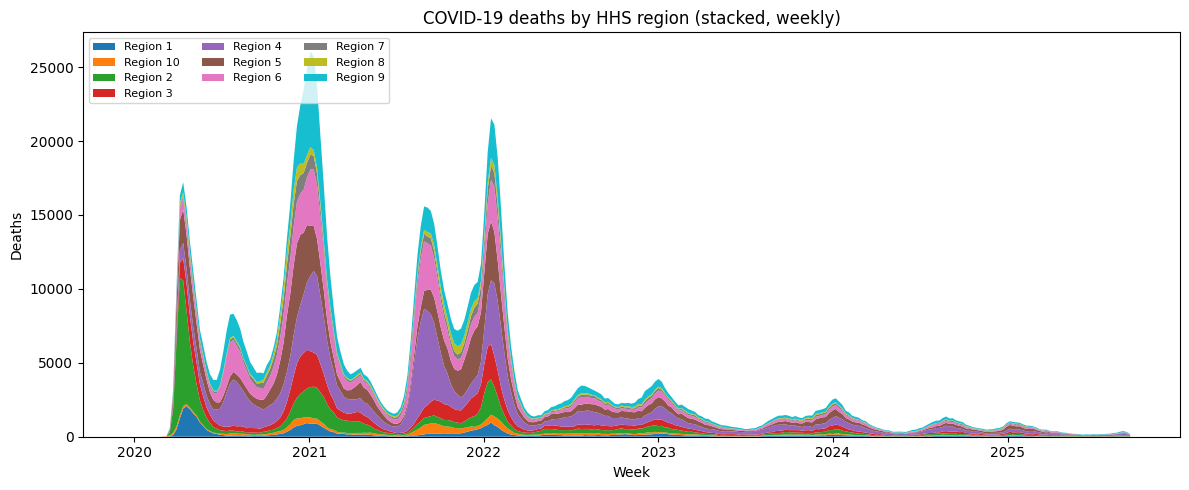

In [55]:
regions = weekly[weekly['jurisdiction_residence'].str.match(r'Region\s+\d+', na=False)].copy()
pivot = (regions.pivot_table(index='data_period_start',
                             columns='jurisdiction_residence',
                             values='covid_deaths',
                             aggfunc='sum')
                 .sort_index())

fig, ax = plt.subplots(figsize=(12,5))
ax.stackplot(pivot.index, pivot.T.values, labels=pivot.columns)
ax.set(title='COVID-19 deaths by HHS region (stacked, weekly)',
       xlabel='Week', ylabel='Deaths')
nice_date_axis(ax)
ax.legend(ncol=3, fontsize=8, loc='upper left')
plt.tight_layout(); plt.show()


Deaths vs “% of total deaths” (scatter) — New York example

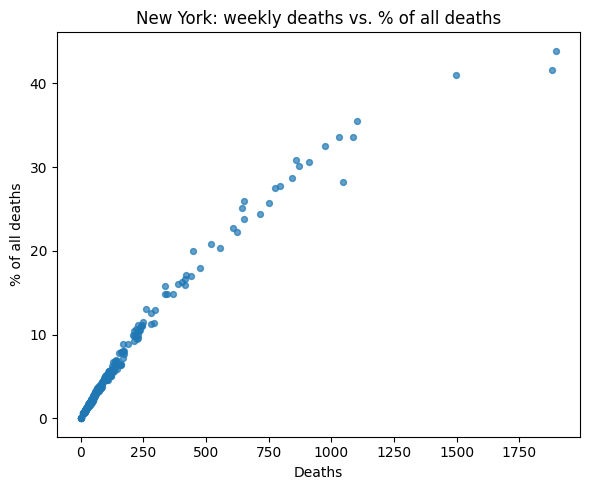

In [56]:
# find the % column if present
pct_col = next((c for c in weekly.columns if 'pct' in c and 'total' in c), None)
if pct_col:
    ny = (weekly[weekly['jurisdiction_residence'].eq('New York')]
            .sort_values('data_period_start'))
    fig, ax = plt.subplots(figsize=(6,5))
    ax.scatter(ny['covid_deaths'], ny[pct_col], s=18, alpha=.7)
    ax.set(title='New York: weekly deaths vs. % of all deaths',
           xlabel='Deaths', ylabel='% of all deaths')
    plt.tight_layout(); plt.show()
else:
    print('No "% of total deaths" column found to make the scatter.')


Peaks annotated (U.S.)

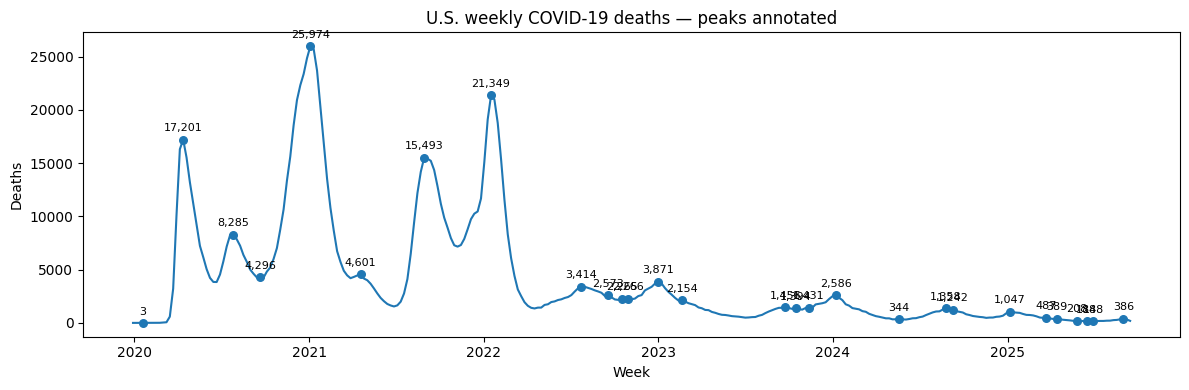

In [57]:
us_sorted = us.sort_values('data_period_start')
y = us_sorted['covid_deaths']
peaks = y.rolling(3, center=True).apply(lambda a: a[1] if a[1]>a[0] and a[1]>a[2] else np.nan, raw=True).dropna()

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(us_sorted['data_period_start'], y, lw=1.5)
ax.scatter(us_sorted.loc[peaks.index, 'data_period_start'], peaks, s=30, zorder=3)
for d, v in us_sorted.loc[peaks.index][['data_period_start','covid_deaths']].itertuples(index=False):
    ax.annotate(f'{int(v):,}', (d, v), textcoords='offset points', xytext=(0,6), ha='center', fontsize=8)
ax.set(title='U.S. weekly COVID-19 deaths — peaks annotated', xlabel='Week', ylabel='Deaths')
nice_date_axis(ax)
plt.tight_layout(); plt.show()
